# Klassifikation und Regression mit der *scikit-learn* Bibliothek

## Klassifikation

Bei einer Klassifikation wird ein Datenpunkt $\mathbf{x}$ einer von $N$ Klassen zugeordnet. Die einzelnen Einträge von $\mathbf{x}$ werden *Features* genannt, $\mathbf{x}$ ist ein *Feature-Vektor*.
<br>
**Zwei Klassen und zwei Features**:
<br>
<img src="2_classes.png" alt="2 Klassen" width="300"/>
<br>
**Drei Klassen und drei Features**:
<br>
<img src="3_classes_3d.png" alt="3 Klassen" width="300"/>

Ein Klassifikator ist eine *Funktion*, die einen Datenpunkt erhält und für diesen eine Klasse ausgibt: 
$$ f(\mathbf{x}) = \text{class}$$
Ziel ist es nun eine *Funktion* $f$ zu finden, die für möglichst alle Datenpunkte die richtige Klasse ausgibt. Dafür gibt es bereits verschiedene Machine Learning Verfahren. Die gängigsten sind in der Python-Bibliothek *scikit-learn* implementiert.  


# Übungsaufgaben

## Dataset: Iris

Verfügbar unter: https://datahub.io/machine-learning/iris/r/iris.csv. Dieser Datensatz enthält 4 Features für 3 verschiedene Spezies (Klassen) der Schwertlilie.

In [2]:
# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# render plots in jupyter notebook
%matplotlib inline

## 1. Datensatz einlesen und vorverarbeiten

a) Lies den Datensatz mithilfe von Pandas ein und mach dich mit ihm vertraut. Wie groß ist der Datensatz? Welche Features gibt es?

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.columns.values

array(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'],
      dtype=object)

b) Unterteile das DataFrame in die zwei DataFrames ```df_features``` und ```df_class```, die nur die entsprechenden Größen enthalten.

In [6]:
df_features = df.drop(columns=['class'])
df_class = df['class']

c) ```df_class``` enthält die Klassen in Form von Strings. Diese Darstellung ist für die nachfolgenden Arbeitsschritte ungeeignet. Bringe das DataFrame ```df_class``` mithilfe von Pandas in folgende Form:<br>
<img src="one_hot_encoded.png" alt="One hot encoded" width="200"/>

**Tipp:** Dieses Darstellung nennt man auch *One Hot Encoding*.

In [8]:
df_class = pd.get_dummies(df_class)
df_class

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


 d) Um zu überprüfen, ob der Klassifikator fremde Datenpunkte zuordnen kann, muss der Datensatz in ein *Trainingsset* und ein *Testset* unterteilt werden. Der Klassifikator wird auf dem *Trainingsset* trainiert und seine Performace auf dem *Testset* validiert, welches er zuvor nie gesehen hat. So wird sichergestellt, dass er die Datenpunkte nicht "auswendig lernt". 

Teile den Datensatz mithilfe der *scikit-learn*-Bibliothek in *Trainings-* und *Testset* auf. Dabei soll der Trainingsdatensatz 75% der Datenpunkte enthalten.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    df_class,
                                                    test_size=0.25)

## 2. k-nearest-neighbors

Der *k-nearest-neighbors*-Klassifikator vergleicht einen fremden Datenpunkt mit den $k$ Datenpunkten aus dem *Trainingsset* , welche die kürzeste euklidsche Distanz zu dem neuen Datenpunkt besitzen. Der Datenpunkt erhält dann die Klasse, die der Mehrheit der umliegenden Datenpunkte entspricht. Darum wird $k$ immer ungerade gewählt.

a) Importiere den *k-nearest-neighbors*-Klassifikator aus der *scikit-learn*-Bibliothek und initialisiere eine Instanz des Klassifikators mit 7 nächsten Nachbarn.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7)

b) Trainiere den Klassifikator auf dem Trainingsdatensatz.

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

c) Der Klassifikator kann jetzt einen neuen Datenpunkt erhalten und ihn einer der drei Klassen zuordnen. Wende die ```predict()```-Methode des Klassifikators auf die Test-Datenpunkte an und lass dir das Ergebnis ausgeben.  Was bedeutet die Ausgabe?

In [10]:
clf.predict(X_test)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

<br>
<img src="table.jpeg" alt="Tabelle" width="600"/>
<br>

d) 


Die Accuracy des Klassifikators kann berechnet werden als 
$$ \text{Accuracy} = \frac{\text{#TP + #TN}}{\text{#TP + #TN + #FP + #FN}}$$
mit TP = True Positives, TN = True Negatives, FP = False Positives und FN = False Negatives.
Berechne die Accuracy auf dem Testdatensatz und überprüfe dein Ergebnis mit der ```score()```-Methode.

In [11]:
n_right = 0

for true, pred in zip(y_test.values, clf.predict(X_test)):
    if sum(true-pred) == 0:
        n_right += 1
n_total = y_test.shape[0]
print(n_right/n_total)
print(clf.score(X_test, y_test))

0.8947368421052632
0.8947368421052632


e) Verändere die Anzahl an nächsten Nachbarn im Klassifikator und beobachte, wie sich dieser Parameter auf die Accuracy auswirkt.

## 3. Decision Trees

Decision Trees klassifizieren den Datensatz anhand einfacher Entscheidungsregeln, z.B:
```python
if Feature_1 > 0.5:
    return Class_A
else:
    return Class_B
```
Um die Koplexität des Datensatzes widerzuspiegeln werden mehrere dieser Entscheidungsknoten aneinandergehängt. Diese Knoten bilden dann den Entscheidungsbaum. Der Decision Tree Algorithmus versucht Entscheidungsregeln zu finden, die den Trainingsdatensatz bestmöglich trennen.

a) Importiere den *DecisionTree*-Klassifikator aud der *scikit-learn*-Bibliothek und initialisiere eine Instanz des Klassifikators.

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

b) Nimm eine Klassifikation auf dem Iris-Datensatz vor. Benutze dieses mal nur die Features 'sepallength' und 'sepalwidth' für die Klassifikation. Berechne die Accuracy mit mit der ```score()```-Methode.

In [13]:
X_train_small = X_train[['sepallength', 'sepalwidth']]

X_test_small = X_test[['sepallength', 'sepalwidth']]

clf.fit(X_train_small, y_train)
clf.score(X_test_small, y_test)

NameError: name 'X_train' is not defined

c) Führe den nachfolgenden Code aus. Was genau wird abgebildet? In welchen Merkmalen des Schaubildes spiegelt sich die Funktionsweise eines Entscheidungsbaumes wider?

In [14]:

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 0, 1), (1, 0.6, 0), (0, 1, 0)]
cm = LinearSegmentedColormap.from_list(
        'custom', colors, N=3)

x_min, x_max = X_train['sepallength'].min() - 1, X_train['sepallength'].max() + 1
y_min, y_max = X_train['sepalwidth'].min() - 1, X_train['sepalwidth'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = np.argmax(clf.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=cm)

sns.scatterplot(x='sepallength', y='sepalwidth', data=df, hue='class')
plt.show()

NameError: name 'X_train' is not defined

## 4. Random Forest und Metriken

Ein Random Forest Klassifikator setzt sich aus mehreren Decision Trees zusammen. Beim Prädizieren wird die finale Klasse durch eine Mehrheitsentscheidung festgelegt.

a) Lies den Datensatz *3d_printer.csv* mit pandas ein und teile den Datensatz in Testset und Trainingsset auf. Das Label/ die Zielgröße soll dabei die Spalte *material* sein. Transfomiere dieses mal die kategorischen Spalten *infill_pattern* und *material* mit dem ```LabelBinarizer``` von *scikit-learn* und dessen Methode ```fit_transform()```.

In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
df = pd.read_csv('3d_printer.csv')
df.head()

x = df.drop(columns=['material'])
y = df[['material']]

lb_x = LabelBinarizer()
x['infill_pattern'] = lb_x.fit_transform(x['infill_pattern'])

lb_y = LabelBinarizer()
y = lb_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25)

b) Importiere den Random Forest Klassifikator der *scikit-learn*-Bibliothek mit ```n_estimators=50``` und ```max_depth=3``` und trainiere diesen auf dem Datensatz.

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_depth=3)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)


/var/folders/w6/rfxdb04d6hsfbd7fbcdxyf_m0000gn/T/ipykernel_74636/2855141895.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


1.0

Die Accuracy eine Klassifikators ist nur eine vielen Metriken, mit denen sich die Qualität eines Models messen lässt. Für Datensätze mit einer sehr ungleichen Klassenverteilung kann die Accuracy hoch sein, da der Klassifikator meist die häufigere Klasse prädiziert. Aus der Accuracy kann dann jedoch keine Aussage über die Fähigkeiten des Modells bezüglich der kleineren Klasse getroffen werden. Für diesen Fall wählt man häufig die Metriken Precision und Recall. Die Precision ist definiert als $$ \text{Precision} = \frac{\text{#TP}}{\text{#TP + #FP}}$$ Der Recall ist gegeben durch $$ \text{Recall} = \frac{\text{#TP}}{\text{#TP + #FN}}$$

c) Berechne Precision und Recall für obigen Klassifikator mithilfe der eingebauten scikit Funktionen.

In [17]:
from sklearn.metrics import recall_score, precision_score

acc = clf.score(X_test, y_test)
prec = precision_score(y_test, clf.predict(X_test))
recall = recall_score(y_test, clf.predict(X_test))

print(f'Accuracy: {acc}, Precission: {prec}, Recall: {recall}')


Accuracy: 0.8461538461538461, Precission: 1.0, Recall: 0.7142857142857143


## 5. Support Vector Machine

Die Support Vector Machine versucht eine Hyperebene zu finden, die einen gegebenen Datensatz bestmöglich trennt:
<br>
<img src="2_classes_svm.png" alt="2 Klassen" width="300"/>

Diese Hyperebene ist definiert über einen Normalenvektor $\mathbf{w}$, der durch den Ursprung verläuft und einen Abstand zum Ursprung $b$. Ziel ist es also $\mathbf{w}$ und $b$ so zu wählen, dass der Datensatz möglichst eindeutig getrennt werden kann. Punkte auf der Hyperebene erfüllen die Ebenengleichung
$$ \mathbf{w} \cdot \mathbf{x} + b = 0.$$
Für Punkte links oder rechts der Hyperebene gilt
$$ \mathbf{w} \cdot \mathbf{x} + b < 0 \quad \text{bzw.} \quad \mathbf{w} \cdot \mathbf{x} + b > 0 .$$
Für zwei Klassen kann dann eine Klassifikation mittels $y_i = \text{sgn}(\mathbf{w} \cdot \mathbf{x}_i + b)$ erfolgen. Der Abstand zwischen Datenpunkten und Hyperebene ist dann maximal, wenn der Betrag von $\mathbf{w}$ minimal ist unter der Nebenbedingung, dass sich möglichst alle Datenpunkte auf der korrekten Seite der Hyperebene befinden, geschrieben als $y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$. Dies führt zu dem Optimierungsproblem
$$ L(\mathbf{w}, b, \lambda) = \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i=1}^N \lambda_i (y_i (\mathbf{w} \cdot \mathbf{x}_i + b)-1) $$

Im Realfall lässt sich ein Datensatz meist nicht perfekt sauber trennen. Um das Minimierungsproblem trotzdem lösen zu können wird daher noch ein Term mit Schlupfvariablen $\xi_i$ eingeführt, der die strenge Minimierung auflockert und mit einer positiven Konstante $C$ skaliert wird:
$$ C \sum_{i=1}^N\xi_i$$

a) Im unteren Block wird ein synthetischer Datensatz aus einer Sinus-Funktion und Rauschen konstruiert. Plotte den Datensatz mithilfe von *matplotlib* oder *seaborn*.

In [18]:
X = np.linspace(0,4,100).reshape(-1, 1)
y = np.sin(X)+ np.random.uniform(low=-0.3, high=0.3, size=X.shape)

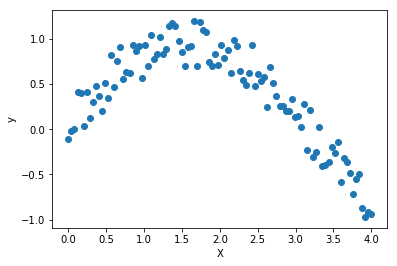

In [19]:
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X,y)
#sns.lineplot(X,y)

b) Importiere den Support Vector Regressor der *scikit-learn*-Bibliothek und initialiere eine Instanz dieser Klasse. Nimm wieder einen Train-Test-Split vor und trainiere den Regressor auf den Trainingsdaten. Prädiziere nun auf den Testdatensatz und stelle die vorhergesagten Werte sowie den ursprünglichen Datensatz in einem Diagramm dar. Wähle für die Support Vector Machine die Option ```C``` manuell. Wähle dabei für ```C``` die Werte 0.01, 10 und 1000. Was funktioniert am besten? 

C:\Users\phw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\phw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


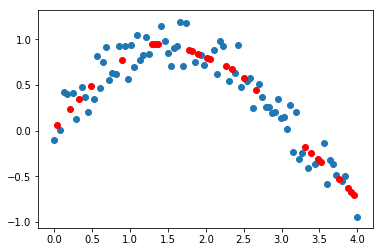

In [20]:
from sklearn.svm import SVR

rgr = SVR(C=10)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25)
rgr.fit(X_train, y_train)
y_pred = rgr.predict(X_test)

plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred, color='red')
plt.show()

c) Wir wollen nun versuchen, den $y$-Wert zu einem einzelnen Datenpunkt vorherzusagen. Prädiziere mit deinem Regressor den $y$-Wert zu einem Wert von $x>4$ und vergleiche es mit $\sin (x)$. Was fällt dir auf? Wie kommt der Unterschied zustande? Tipp: Die ```predict()```-Methode benötigt einen Wert in der Form ``` predict([[5]])```

In [21]:
rgr.predict([[5]])

array([-0.93994791])

In [22]:
np.sin(5)

-0.9589242746631385

#### Klassifikation mit SVM

Im den Folgenden Blöcken ist das Training einer Support Vector Machine zur Klassifikation des Moon-Datensatzes implementiert. Führe die Codeblöcke zunächst aus und versuche alle Trainingsschritte nachzuvollziehen. Erhöhe jetzt die Anzahl der Trainingspunkte (bis maximal 10000). Was fällt dir beim Training auf? Miss die Dauer des Trainings mithilfe der Python-Module `time` oder `datetime` und plotte die Trainingsdauer in Abhängigkeit der Anzahl an Datenpunkten. Welches Verhalten kannst du erkennen?

In [23]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np


noisy_moons, labels = datasets.make_moons(n_samples=200, noise=.2)
X_train, X_test, y_train, y_test = train_test_split(noisy_moons, labels, test_size=0.25)


clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C:\Users\phw\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


No handles with labels found to put in legend.


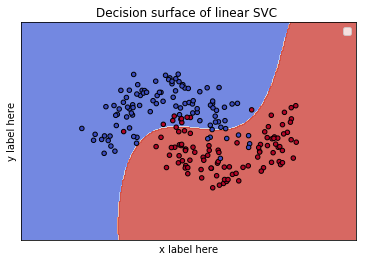

In [24]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = noisy_moons[:, 0], noisy_moons[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [41]:
from datetime import datetime


times = []
n_points = [100*n for n in range(1,100)]
for n in n_points:
    noisy_moons, labels = datasets.make_moons(n_samples=n, noise=.2)
    X_train, X_test, y_train, y_test = train_test_split(noisy_moons, labels, test_size=0.25)

    clf = SVC(gamma="scale")
    start = datetime.now()
    clf.fit(X_train, y_train)
    end = datetime.now()
    times.append((end-start).microseconds)

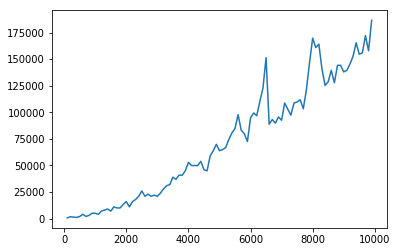

In [42]:
plt.plot(n_points, times)
plt.show()